In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


In [5]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


In [20]:
img_width = 150
img_height = 150

train_data_dir =  r'C:\Users\Janvi Pagariya\Downloads\brain tumor\brain_tumor_dataset'
validation_data_dir = r'C:\Users\Janvi Pagariya\Downloads\brain tumor\brain_tumor_dataset'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
from tensorflow import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [24]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 253 images belonging to 2 classes.


In [26]:
print(train_generator.class_indices)

{'no': 0, 'yes': 1}


In [27]:
imgs, labels = next(train_generator)

In [28]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
0.0


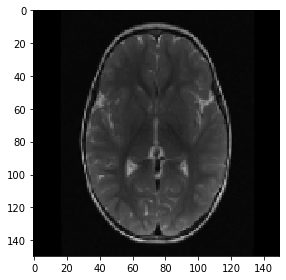

1.0


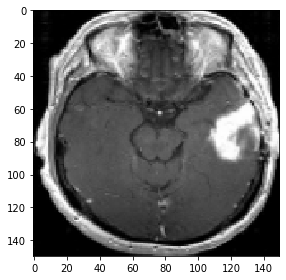

1.0


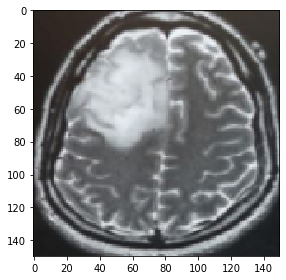

0.0


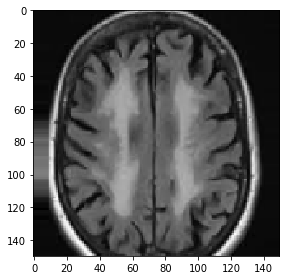

1.0


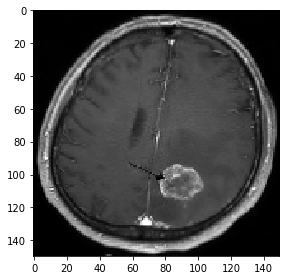

1.0


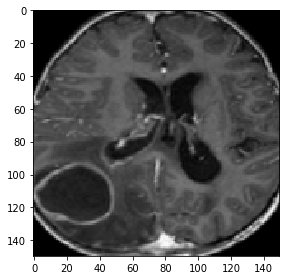

1.0


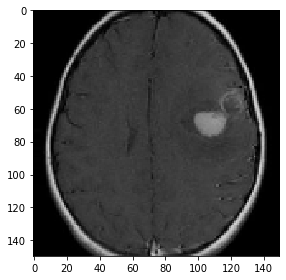

1.0


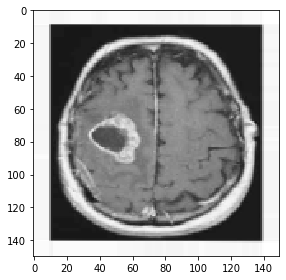

1.0


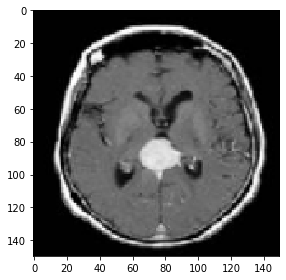

1.0


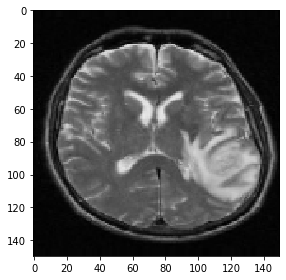

1.0


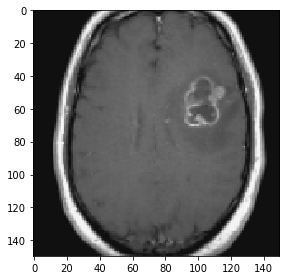

1.0


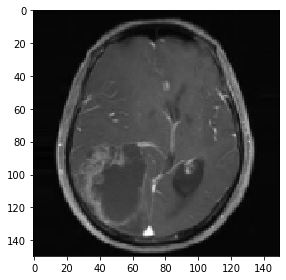

1.0


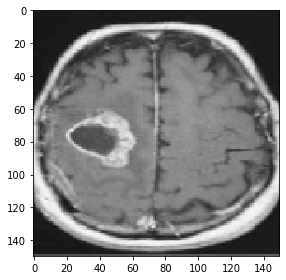

0.0


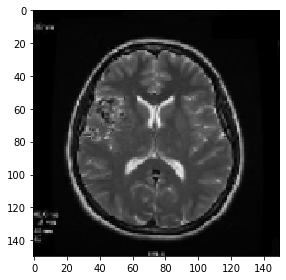

1.0


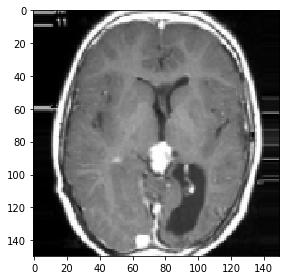

1.0


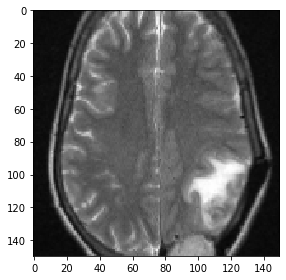

1.0


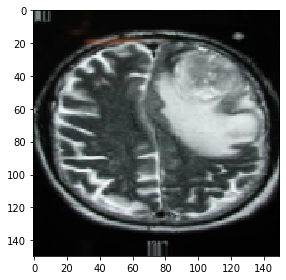

0.0


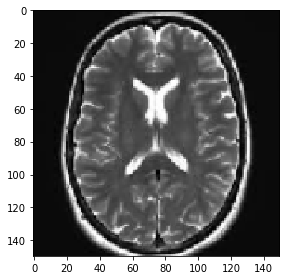

1.0


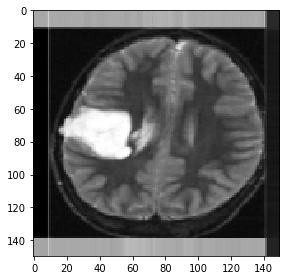

0.0


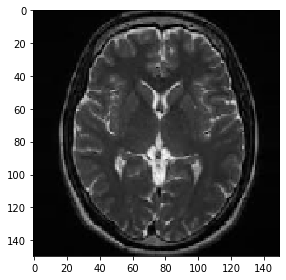

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [30]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 253 images belonging to 2 classes.


In [60]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/5


TypeError: 'NoneType' object is not callable

In [42]:
print (type (train_generator))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [45]:
print (type (validation_generator))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [46]:
print (type (epochs))

<class 'int'>


In [47]:
print (type (validation_samples))

<class 'int'>


In [48]:
print  (train_generator)

In [49]:
print  (validation_samples)

30


In [50]:
print (epochs)

5


In [51]:
print(validation_generator)

In [52]:
print(train_samples)

120
